In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # For saving the model

In [ ]:
import yfinance as yf
stock_data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# prompt: make the stock data to save in csv format

stock_data.to_csv('AAPL_stock_data.csv')
df=pd.read_csv('AAPL_stock_data.csv')

In [ ]:
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
2259,2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800
2260,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2261,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2262,2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848206,34049900
2263,2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802185,42628800


In [ ]:
# Display basic info and statistical summary of the dataframe
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2264 non-null   float64
 2   High       2264 non-null   float64
 3   Low        2264 non-null   float64
 4   Close      2264 non-null   float64
 5   Adj Close  2264 non-null   float64
 6   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 123.9+ KB
None
              Open         High          Low        Close    Adj Close  \
count  2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean     83.956509    84.876609    83.092088    84.026440    81.852794   
std      55.979856    56.611354    55.396020    56.034699    56.305992   
min      22.500000    22.917500    22.367500    22.584999    20.720043   
25%      35.452501    35.651249    35.243749    35.439376    32.999373   
50%      54.039999   

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values


Series([], dtype: int64)


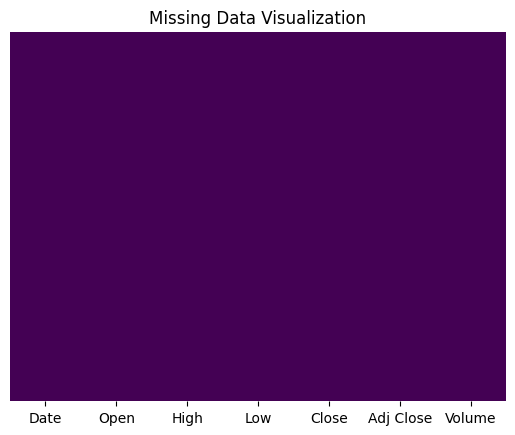

In [ ]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()


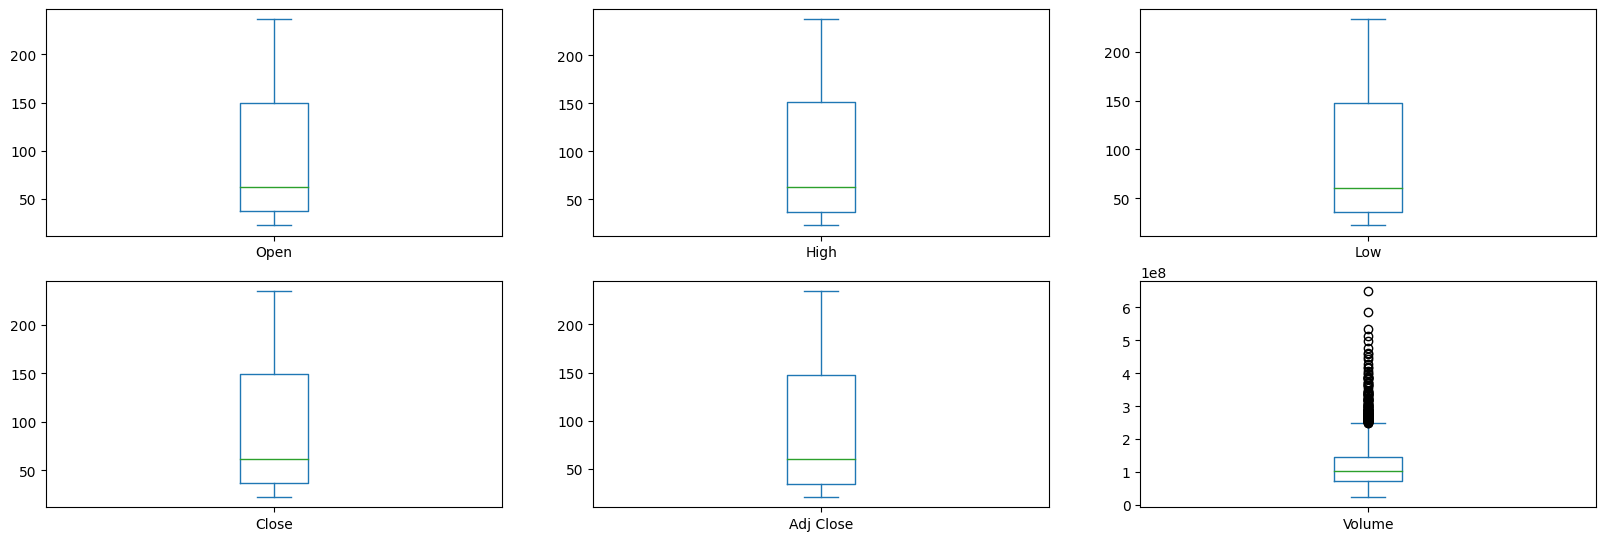

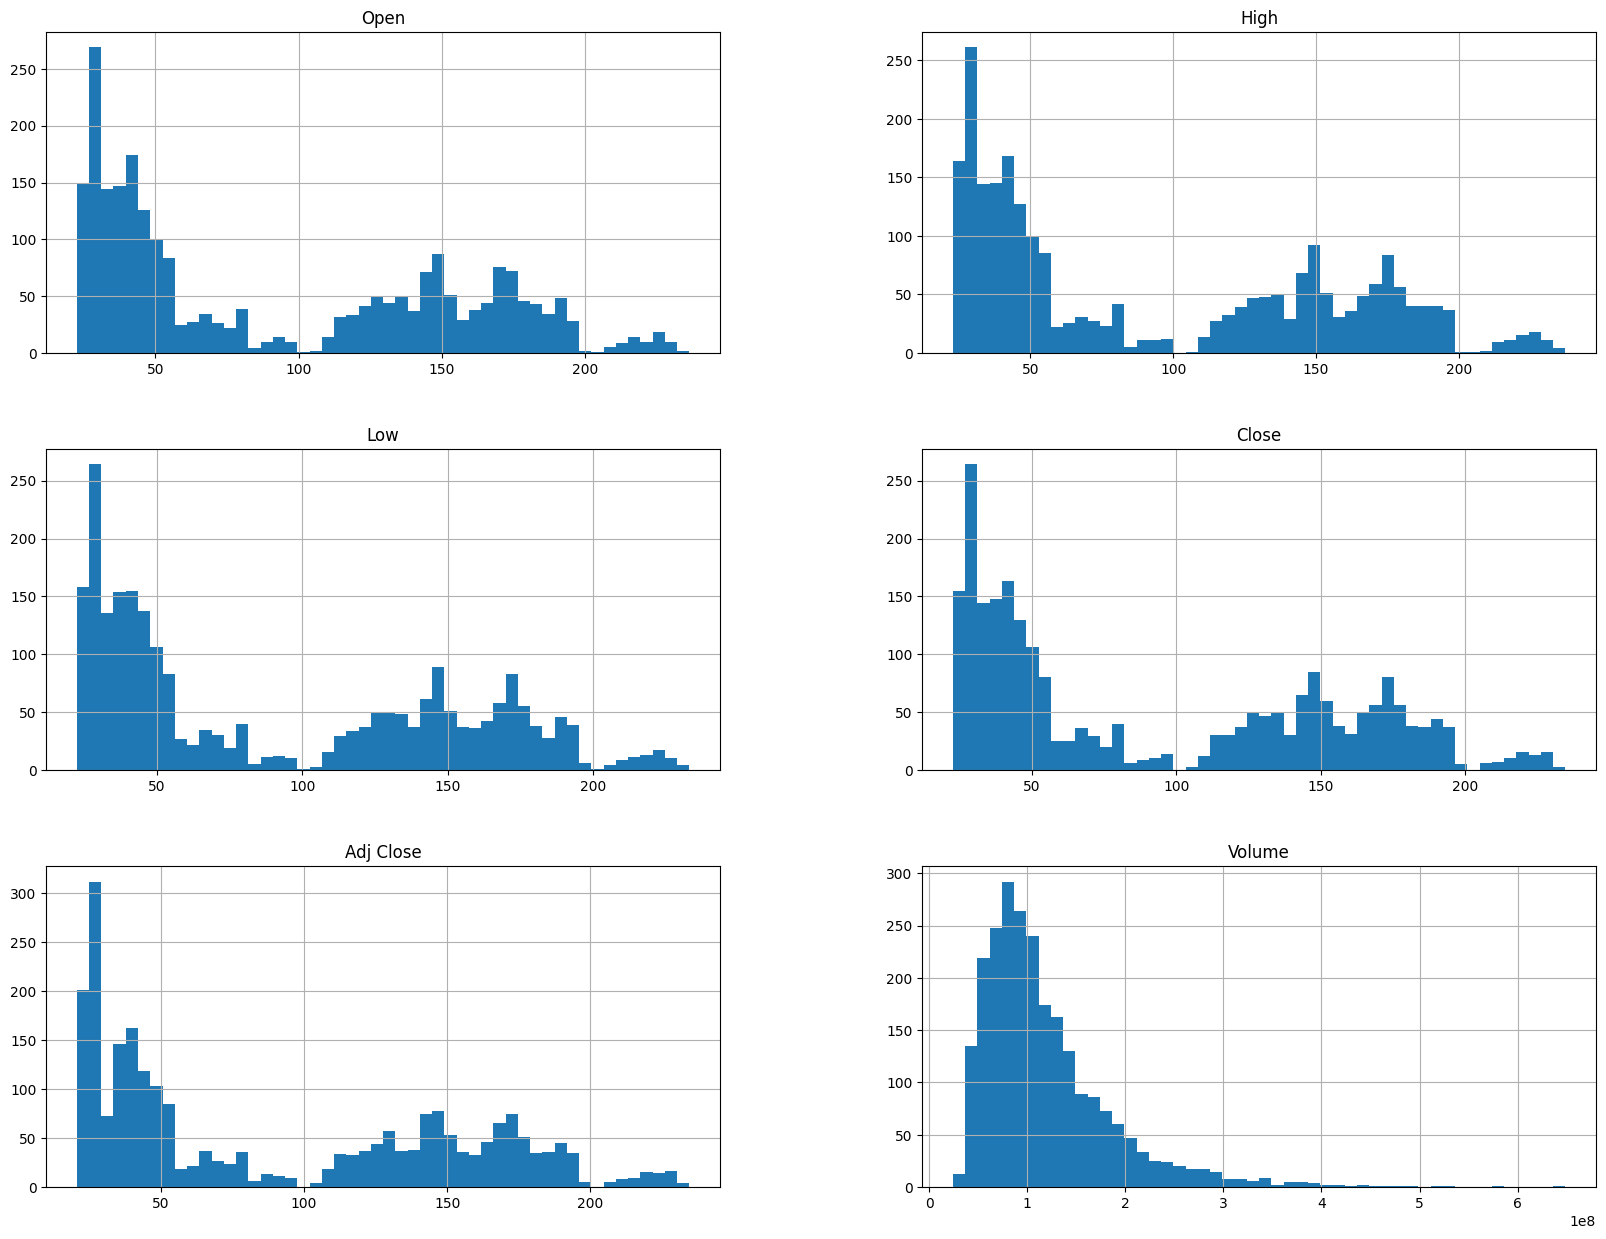

In [ ]:
from math import ceil
# Box plots to visualize outliers
df.plot(kind='box', subplots=True, layout=(ceil(len(df.columns)/3), 3), figsize=(20, 10))
plt.show()

# Histograms for all numeric columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()

# Correlation matrix heatmap
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])  # This selects only the columns with numeric data

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



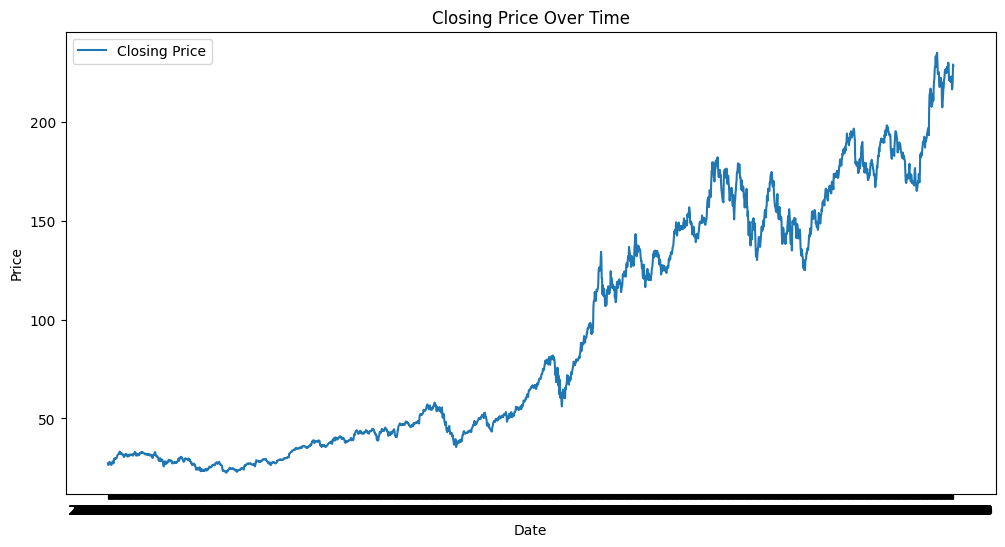

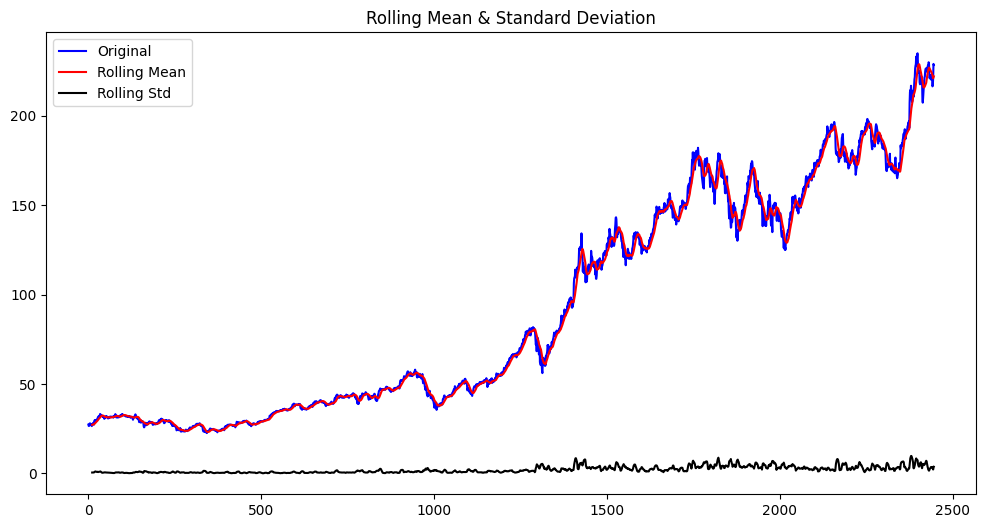

In [ ]:
# Time Series: Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Rolling Mean and Standard Deviation
rolling_mean = df['Close'].rolling(window=12).mean()
rolling_std = df['Close'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


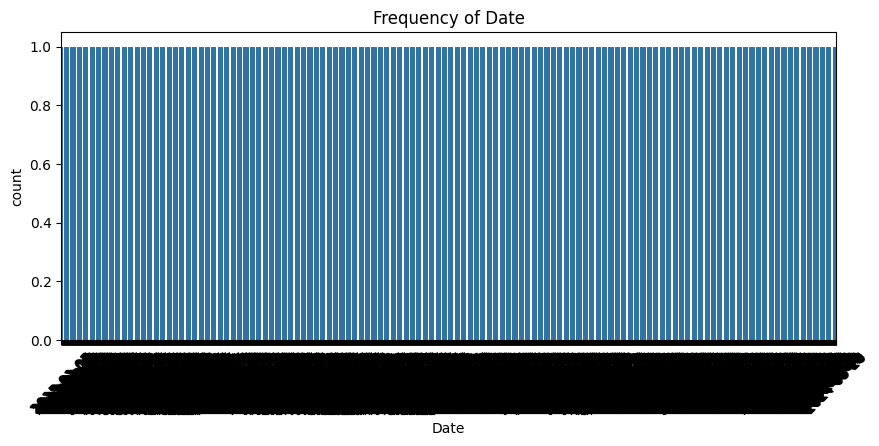

In [ ]:
# Bar charts for categorical data
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # This line imports StandardScaler

# Example dataframe
data = {
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'target': np.random.randint(0, 2, size=100)
}
df = pd.DataFrame(data)

# Prepare features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are ready to be used in machine learning models


In [ ]:
# Dictionary to hold models and results
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    print(f'{name} MSE: {mse}')


Linear Regression MSE: 0.23833806144016476
Random Forest MSE: 0.36982000000000004
Gradient Boosting MSE: 0.5480676896403003
Support Vector Regression MSE: 0.3546326986792698
K-Nearest Neighbors MSE: 0.2800000000000001


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


# Assuming 'closing_price' is the correct column name
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # Optional: set 'Date' as index if dealing with time series

# Check columns to confirm 'closing_price' is correct
print(df.columns)

# ARIMA model
arima_model = ARIMA(df['Close'], order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=1)
print(f'ARIMA Forecast: {arima_forecast}')


KeyError: 'Date'

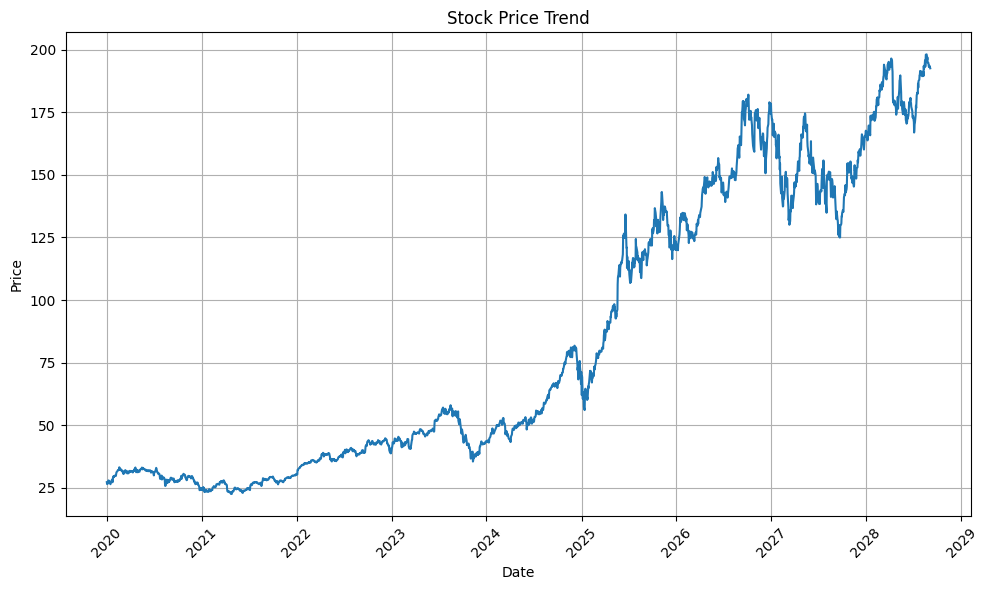

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'stock_data' is your DataFrame
stock_data['Date'] = pd.date_range(start='1/1/2020', periods=len(stock_data), freq='B')

# Stock Price Trends (Close Prices)
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


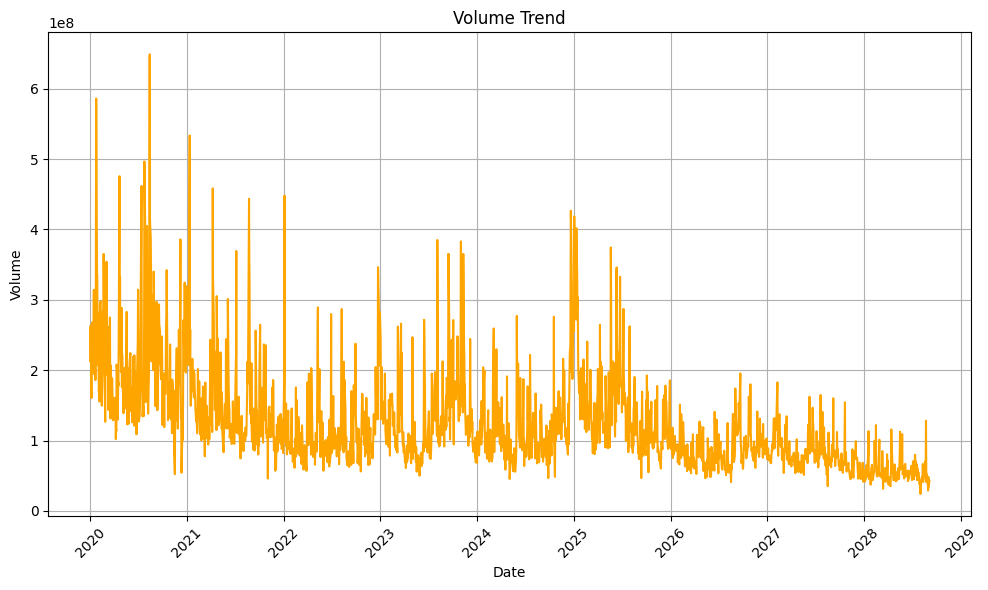

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'stock_data' is your DataFrame
stock_data['Date'] = pd.date_range(start='1/1/2020', periods=len(stock_data), freq='B')

# Volume Trends
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'], stock_data['Volume'], color='orange', label='Volume')
plt.title('Volume Trend')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


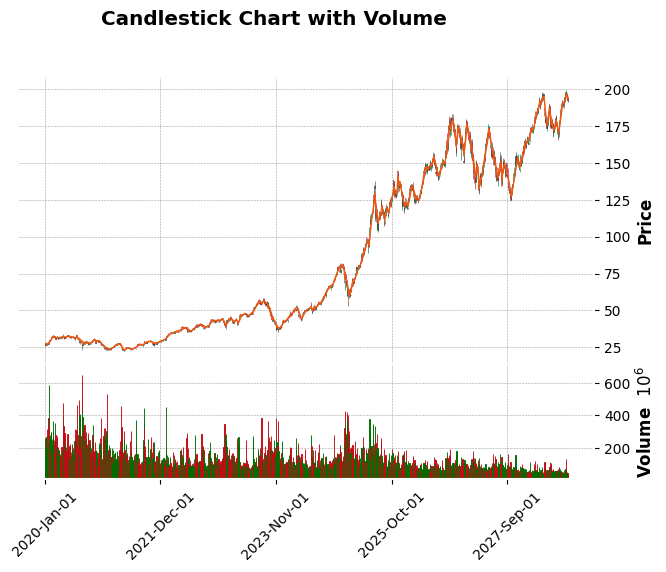

In [ ]:
import mplfinance as mpf
import pandas as pd

# Assuming 'stock_data' is your DataFrame
stock_data['Date'] = pd.date_range(start='1/1/2020', periods=len(stock_data), freq='B')

# Candlestick Chart with Volume
mpf.plot(stock_data.set_index('Date'), type='candle', style='charles', volume=True,
         title='Candlestick Chart with Volume', mav=(5, 10), show_nontrading=False)


In [ ]:
pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


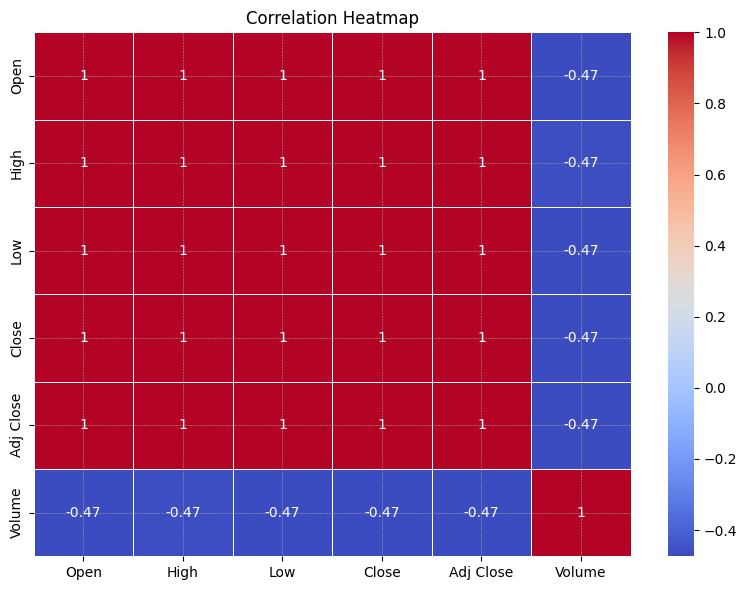

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
